In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [ ]:
# load dataset
df = pd.read_csv("./joined_HPMD.csv")
df.head()

In [ ]:
# drop 2005 data
df =  df[df['Year'] != 2005]
sum_by_year = df.groupby('Year').size()
sum_by_year

In [7]:
gdp_25 = df['Log GDP Per Capita'].quantile(0.25)
gdp_50 = df['Log GDP Per Capita'].quantile(0.50)
gdp_75 = df['Log GDP Per Capita'].quantile(0.75)

def gdp_level(gdp):
    if gdp > gdp_75:
        return 'high'
    elif gdp_50 < gdp <= gdp_75:
        return 'higher-middle'
    elif gdp_25 < gdp <= gdp_50:
        return 'lower-middle'
    else:
        return 'low'

df['gdp_level'] = df['Log GDP Per Capita'].apply(gdp_level)       
    


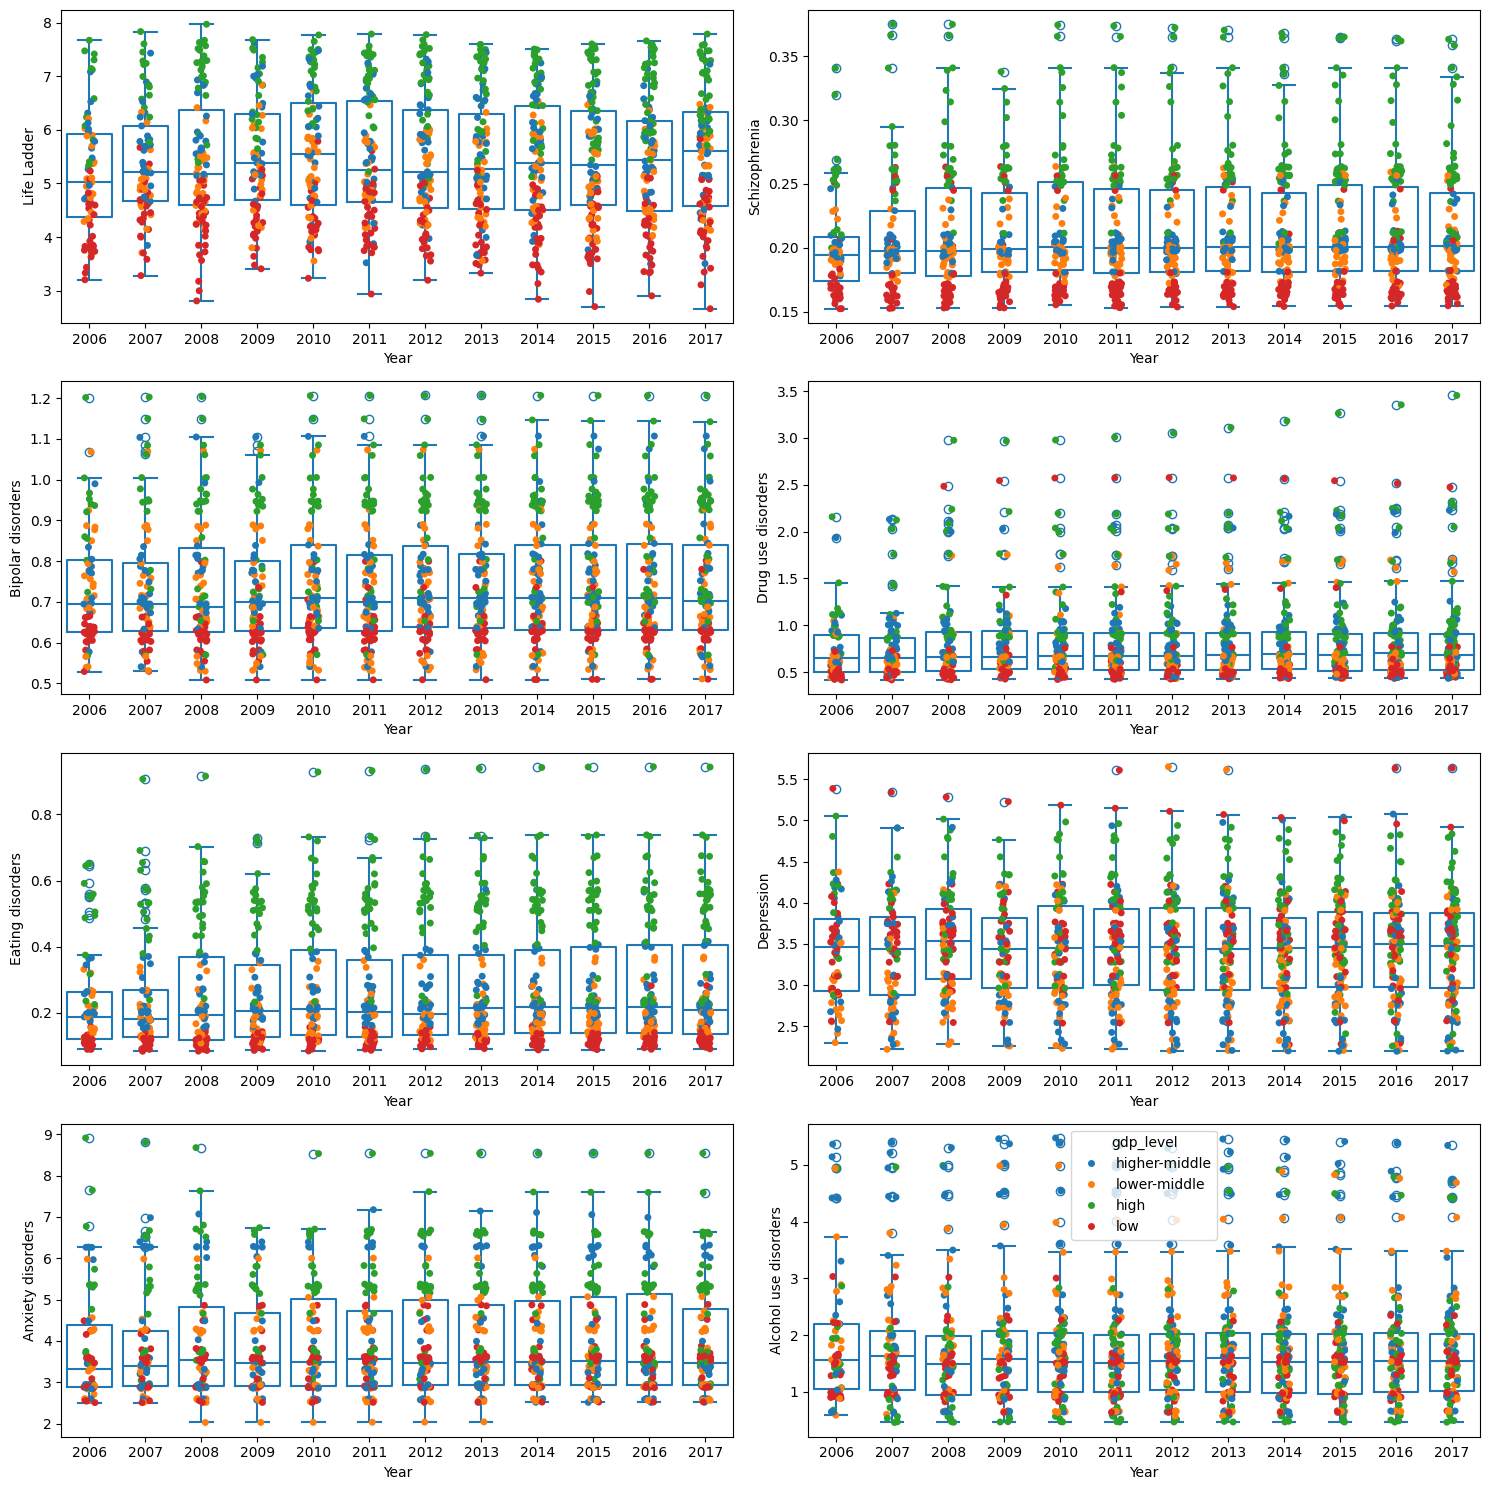

In [8]:
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
sns.boxplot(data=df, x='Year', y='Life Ladder', fill=False, ax = axes[0,0], legend=False)
sns.stripplot(data=df, x='Year', y='Life Ladder', hue='gdp_level', ax = axes[0,0],legend=False)

sns.boxplot(data=df, x='Year', y='Schizophrenia', fill=False, ax = axes[0,1], legend=False)
sns.stripplot(data=df, x='Year', y='Schizophrenia', hue='gdp_level', ax = axes[0,1], legend=False)

sns.boxplot(data=df, x='Year', y='Bipolar disorders', fill=False, ax = axes[1,0], legend=False)
sns.stripplot(data=df, x='Year', y='Bipolar disorders', hue='gdp_level', ax = axes[1,0], legend=False)

sns.boxplot(data=df, x='Year', y='Eating disorders', fill=False, ax = axes[2,0], legend=False)
sns.stripplot(data=df, x='Year', y='Eating disorders', hue='gdp_level', ax = axes[2,0], legend=False)

sns.boxplot(data=df, x='Year', y='Anxiety disorders', fill=False, ax = axes[3,0], legend=False)
sns.stripplot(data=df, x='Year', y='Anxiety disorders', hue='gdp_level', ax = axes[3,0], legend=False)

sns.boxplot(data=df, x='Year', y='Drug use disorders', fill=False, ax = axes[1,1], legend=False)
sns.stripplot(data=df, x='Year', y='Drug use disorders', hue='gdp_level', ax = axes[1,1], legend=False)


sns.boxplot(data=df, x='Year', y='Depression', fill=False, ax = axes[2,1], legend=False)
sns.stripplot(data=df, x='Year', y='Depression', hue='gdp_level', ax = axes[2,1], legend=False)

sns.boxplot(data=df, x='Year', y='Alcohol use disorders', fill=False, ax = axes[3,1], legend=False)
sns.stripplot(data=df, x='Year', y='Alcohol use disorders', hue='gdp_level', ax = axes[3,1])


plt.tight_layout()
plt.show()


In [12]:
gdp_level_map = {'low': 0, 'lower-middle': 1, 'higher-middle': 2, 'high': 3}
df['gdp_level_numeric'] = df['gdp_level'].map(gdp_level_map)
gdp_color_map = {'low': '#a6cc70', 'lower-middle': '#695649', 'higher-middle': '#E59500', 'high': '#348AA7'}


variables = [
    'Schizophrenia', 'Bipolar disorders',
    'Eating disorders', 'Anxiety disorders',
    'Drug use disorders', 'Depression', 'Alcohol use disorders'
]

# Create the initial figure with the first variable
fig = go.Figure()



# Add traces for box plot and strip plot
for var in variables:
    fig.add_trace(
        go.Box(
            x=df['Year'],
            y=df[var],
            name=f"Box: {var}",
            boxpoints='outliers',
            fillcolor='rgba(0,0,0,0)',
            visible=(var == 'Schizophrenia'),  
            showlegend=False,
            line=dict(color='#69A197'),
            hoverinfo='skip',
            
        )
    )
    fig.add_trace(
        go.Scatter(
            x=df['Year'],
            y=df[var],
            mode='markers',
            name=f"Strip: {var}",
            visible=(var == 'Schizophrenia'),
            marker=dict(
                size=8,
                line = dict(width=0.3,color='white'),
                color=[gdp_color_map[level] for level in df['gdp_level']],  # Use custom color mapping
            ),
            
            showlegend= False,
            customdata = df[['Country Name']].values,
            hovertemplate = 'Country: %{customdata[0]}<br>' + 'Year: %{x}<br>'+ '%{y:.2f}' + '<extra></extra>'

        )
    )

for level, color in gdp_color_map.items():
    fig.add_trace(go.Scatter(
        x=[None], y=[None],  
        mode='markers',  
        marker=dict(color=color),  
        name= f'{level}',  
        showlegend=True,  # Show this in the legend
        legendgroup="gdp_level",  # Group all GDP levels together in the legend
    ))
    



# Create a list of buttons for the dropdown menu
buttons = []
for i, var in enumerate(variables):

    visibility = [False] * (2 * len(variables))  # Two traces (box and strip) per variable
    visibility[2 * i] = True  # Enable box plot for this variable
    visibility[2 * i + 1] = True  # Enable strip plot for this variable
    
    for _ in gdp_color_map:
        visibility.append(True)

    
    buttons.append(dict(
        label=var,
        method="update",
        args=[{"visible": visibility}]
    ))

# Update the figure with dropdown menu
fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        direction="down",
        showactive=True,
        x=1,
        xanchor="right",
        y=1.15,
        yanchor="top"
    )],
    xaxis_title="Year",
    yaxis_title="Value",
    title="Mental Disorders Trend, 2006~2017",
    
   
    legend=dict(
        title='GDP Level',
        tracegroupgap=10,
        
    ) 
)

# Show the figure
fig.show()

In [ ]:
fig.write_html("./web/md_boxplot.html")